# Setup

In [1]:
from google.colab import drive
import os

# skip, if not running on Google Colab
drive.mount('/content/gdrive')

os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Kaggle


In [2]:
# import modules and set options
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

pd.options.display.max_rows = 100 #default = 60
sns.set_theme(style="whitegrid")

In [3]:
# load csv dataset into DataFrame
df = pd.read_csv('vehicles.csv')

In [4]:
# sneak peek on data
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


# Preliminary Feature selection

- **County** has no values, hence can be removed.
- Features like **image_url**, **url**, **VIN** and **id**, **description** can be removed as well as they don't serve any analytical purpose for this project.
- Redundant features can be removed as well. E.g. **region_url** contains the same information as region

In [23]:
df = df.drop(['county', 'image_url', 'url', 'VIN', 'id', 'region_url', 'description'], axis=1)
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


# Handling of Missing Values

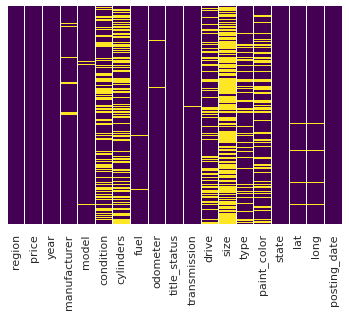

In [24]:
# recap of missing value heat map
sns.heatmap(df.isnull(), 
            yticklabels=False,
            cbar=False, 
            cmap='viridis');

In [22]:
# calculate percentage of missing values per column
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing,
                                 'missing_values': df.isnull().sum()}
                                )
missing_value_df.sort_values(['percent_missing'], ascending=False).transpose()

,size,cylinders,condition,drive,paint_color,type,manufacturer,title_status,lat,long,model,odometer,fuel,transmission,year,description,posting_date,state,price,region
column_name,size,cylinders,condition,drive,paint_color,type,manufacturer,title_status,lat,long,model,odometer,fuel,transmission,year,description,posting_date,state,price,region
percent_missing,71.7675,41.6225,40.7852,30.5863,30.5011,21.7527,4.13371,1.93075,1.53415,1.53415,1.23618,1.03073,0.705819,0.598763,0.282281,0.0163981,0.0159295,0,0,0
missing_values,306361,177678,174104,130567,130203,92858,17646,8242,6549,6549,5277,4400,3013,2556,1205,70,68,0,0,0


This dataset contains a lot of missing values, in one feature it even exceeds a quota of 70%!

In [19]:
df.dropna().head()

,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,lat,long,posting_date
31,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.592000,-85.51890,2021-05-03T14:02:03-0500
55,auburn,https://auburn.craigslist.org,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,Here I have a unmolested Ford F-250 6.0 power ...,al,32.547500,-85.46820,2021-04-29T17:19:18-0500
59,auburn,https://auburn.craigslist.org,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,"Readily available. Excellent condition, clean ...",al,32.628739,-85.46182,2021-04-27T12:20:01-0500
65,auburn,https://auburn.craigslist.org,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,"Ford Super Duty F450 , XL with King Ranch seat...",al,32.630400,-85.40160,2021-04-26T11:15:36-0500
73,auburn,https://auburn.craigslist.org,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,"2017 dodge charger rt runs great $15,000.00",al,32.822400,-85.77040,2021-04-24T18:39:59-0500


# Little's MCAR Test

# Distribution of Data and its Skewness

As is seen over 90% of the data has been removed, but for this data exploration task we'll prioritize data cleanliness over data quantity.

By doing correlation matrices, we can figure out features that aren't needed for some analytical tasks like linear regression

#Correlation between Features

To make out correlation between features we first need to convert categorical features into numerical ones. One way to do this is by one-hot encoding all categorical values

# Pairplot
https://colab.research.google.com/github/kirenz/modern-statistics/blob/main/10a-application-model-exploration.ipynb#scrollTo=cachNh6HBCvh